In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../data/for_modelling/credit_score_valid.csv')
df=pd.concat([df_train, df_val])
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,2783,1855,0,0.6665,0.00,0.0000,103,74,0.7184,0.0370,...,2.5003,0.0000,No,0,0,0,1,0,570,0
1,314430,445442,707468,1.4167,2.25,1.5882,35861,29157,0.8131,0.1141,...,0.5882,0.3704,High,1,0,1,1,0,691,0
2,161773,517674,2782496,3.2000,17.20,5.3750,3716,2533,0.6816,0.0230,...,0.3125,0.0581,No,1,1,1,1,1,520,0
3,16014,97685,20818,6.1000,1.30,0.2131,637,187,0.2936,0.0398,...,0.1639,0.7692,No,1,0,0,1,0,654,0
4,193225,1410542,2589215,7.3000,13.40,1.8356,5276,2325,0.4407,0.0273,...,0.1370,0.0746,No,1,1,0,1,1,552,0


#1 - Variables transformation

In [2]:
#let's check which columns are binary
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['CAT_DEBT',
 'CAT_CREDIT_CARD',
 'CAT_MORTGAGE',
 'CAT_SAVINGS_ACCOUNT',
 'CAT_DEPENDENTS',
 'DEFAULT']

In [3]:
# take rest columns
rest_cols = [col for col in df.columns if col not in binary_cols]
rest_cols

['INCOME',
 'SAVINGS',
 'DEBT',
 'R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'T_CLOTHING_12',
 'T_CLOTHING_6',
 'R_CLOTHING',
 'R_CLOTHING_INCOME',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'T_EDUCATION_12',
 'T_EDUCATION_6',
 'R_EDUCATION',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'T_ENTERTAINMENT_12',
 'T_ENTERTAINMENT_6',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_SAVINGS',
 'R_ENTERTAINMENT_DEBT',
 'T_FINES_12',
 'T_FINES_6',
 'R_FINES',
 'R_FINES_INCOME',
 'R_FINES_SAVINGS',
 'R_FINES_DEBT',
 'T_GAMBLING_12',
 'T_GAMBLING_6',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'T_GROCERIES_12',
 'T_GROCERIES_6',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'T_HEALTH_12',
 'T_HEALTH_6',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'T_HOUSING_12',
 'T_HOUSING_6',
 'R_HOUSING',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R

In [4]:
# remove CAT_GAMBLING column from rest_cols
rest_cols.remove('CAT_GAMBLING')
rest_cols

['INCOME',
 'SAVINGS',
 'DEBT',
 'R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'T_CLOTHING_12',
 'T_CLOTHING_6',
 'R_CLOTHING',
 'R_CLOTHING_INCOME',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'T_EDUCATION_12',
 'T_EDUCATION_6',
 'R_EDUCATION',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'T_ENTERTAINMENT_12',
 'T_ENTERTAINMENT_6',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_SAVINGS',
 'R_ENTERTAINMENT_DEBT',
 'T_FINES_12',
 'T_FINES_6',
 'R_FINES',
 'R_FINES_INCOME',
 'R_FINES_SAVINGS',
 'R_FINES_DEBT',
 'T_GAMBLING_12',
 'T_GAMBLING_6',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'T_GROCERIES_12',
 'T_GROCERIES_6',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'T_HEALTH_12',
 'T_HEALTH_6',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'T_HOUSING_12',
 'T_HOUSING_6',
 'R_HOUSING',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R

In [5]:
# boxplots for rest_cols
#for col in rest_cols:
#   sns.boxplot(x=df[col])
#    plt.show()


In [6]:
# using pyod to detect outliers
from pyod.models.knn import KNN
clf = KNN(contamination=0.1)
clf.fit(df[rest_cols])
outliers=pd.DataFrame(clf.labels_, columns=['outliers'])
outliers['outliers'] = clf.labels_
outliers.value_counts()

outliers
0           565
1            63
Name: count, dtype: int64

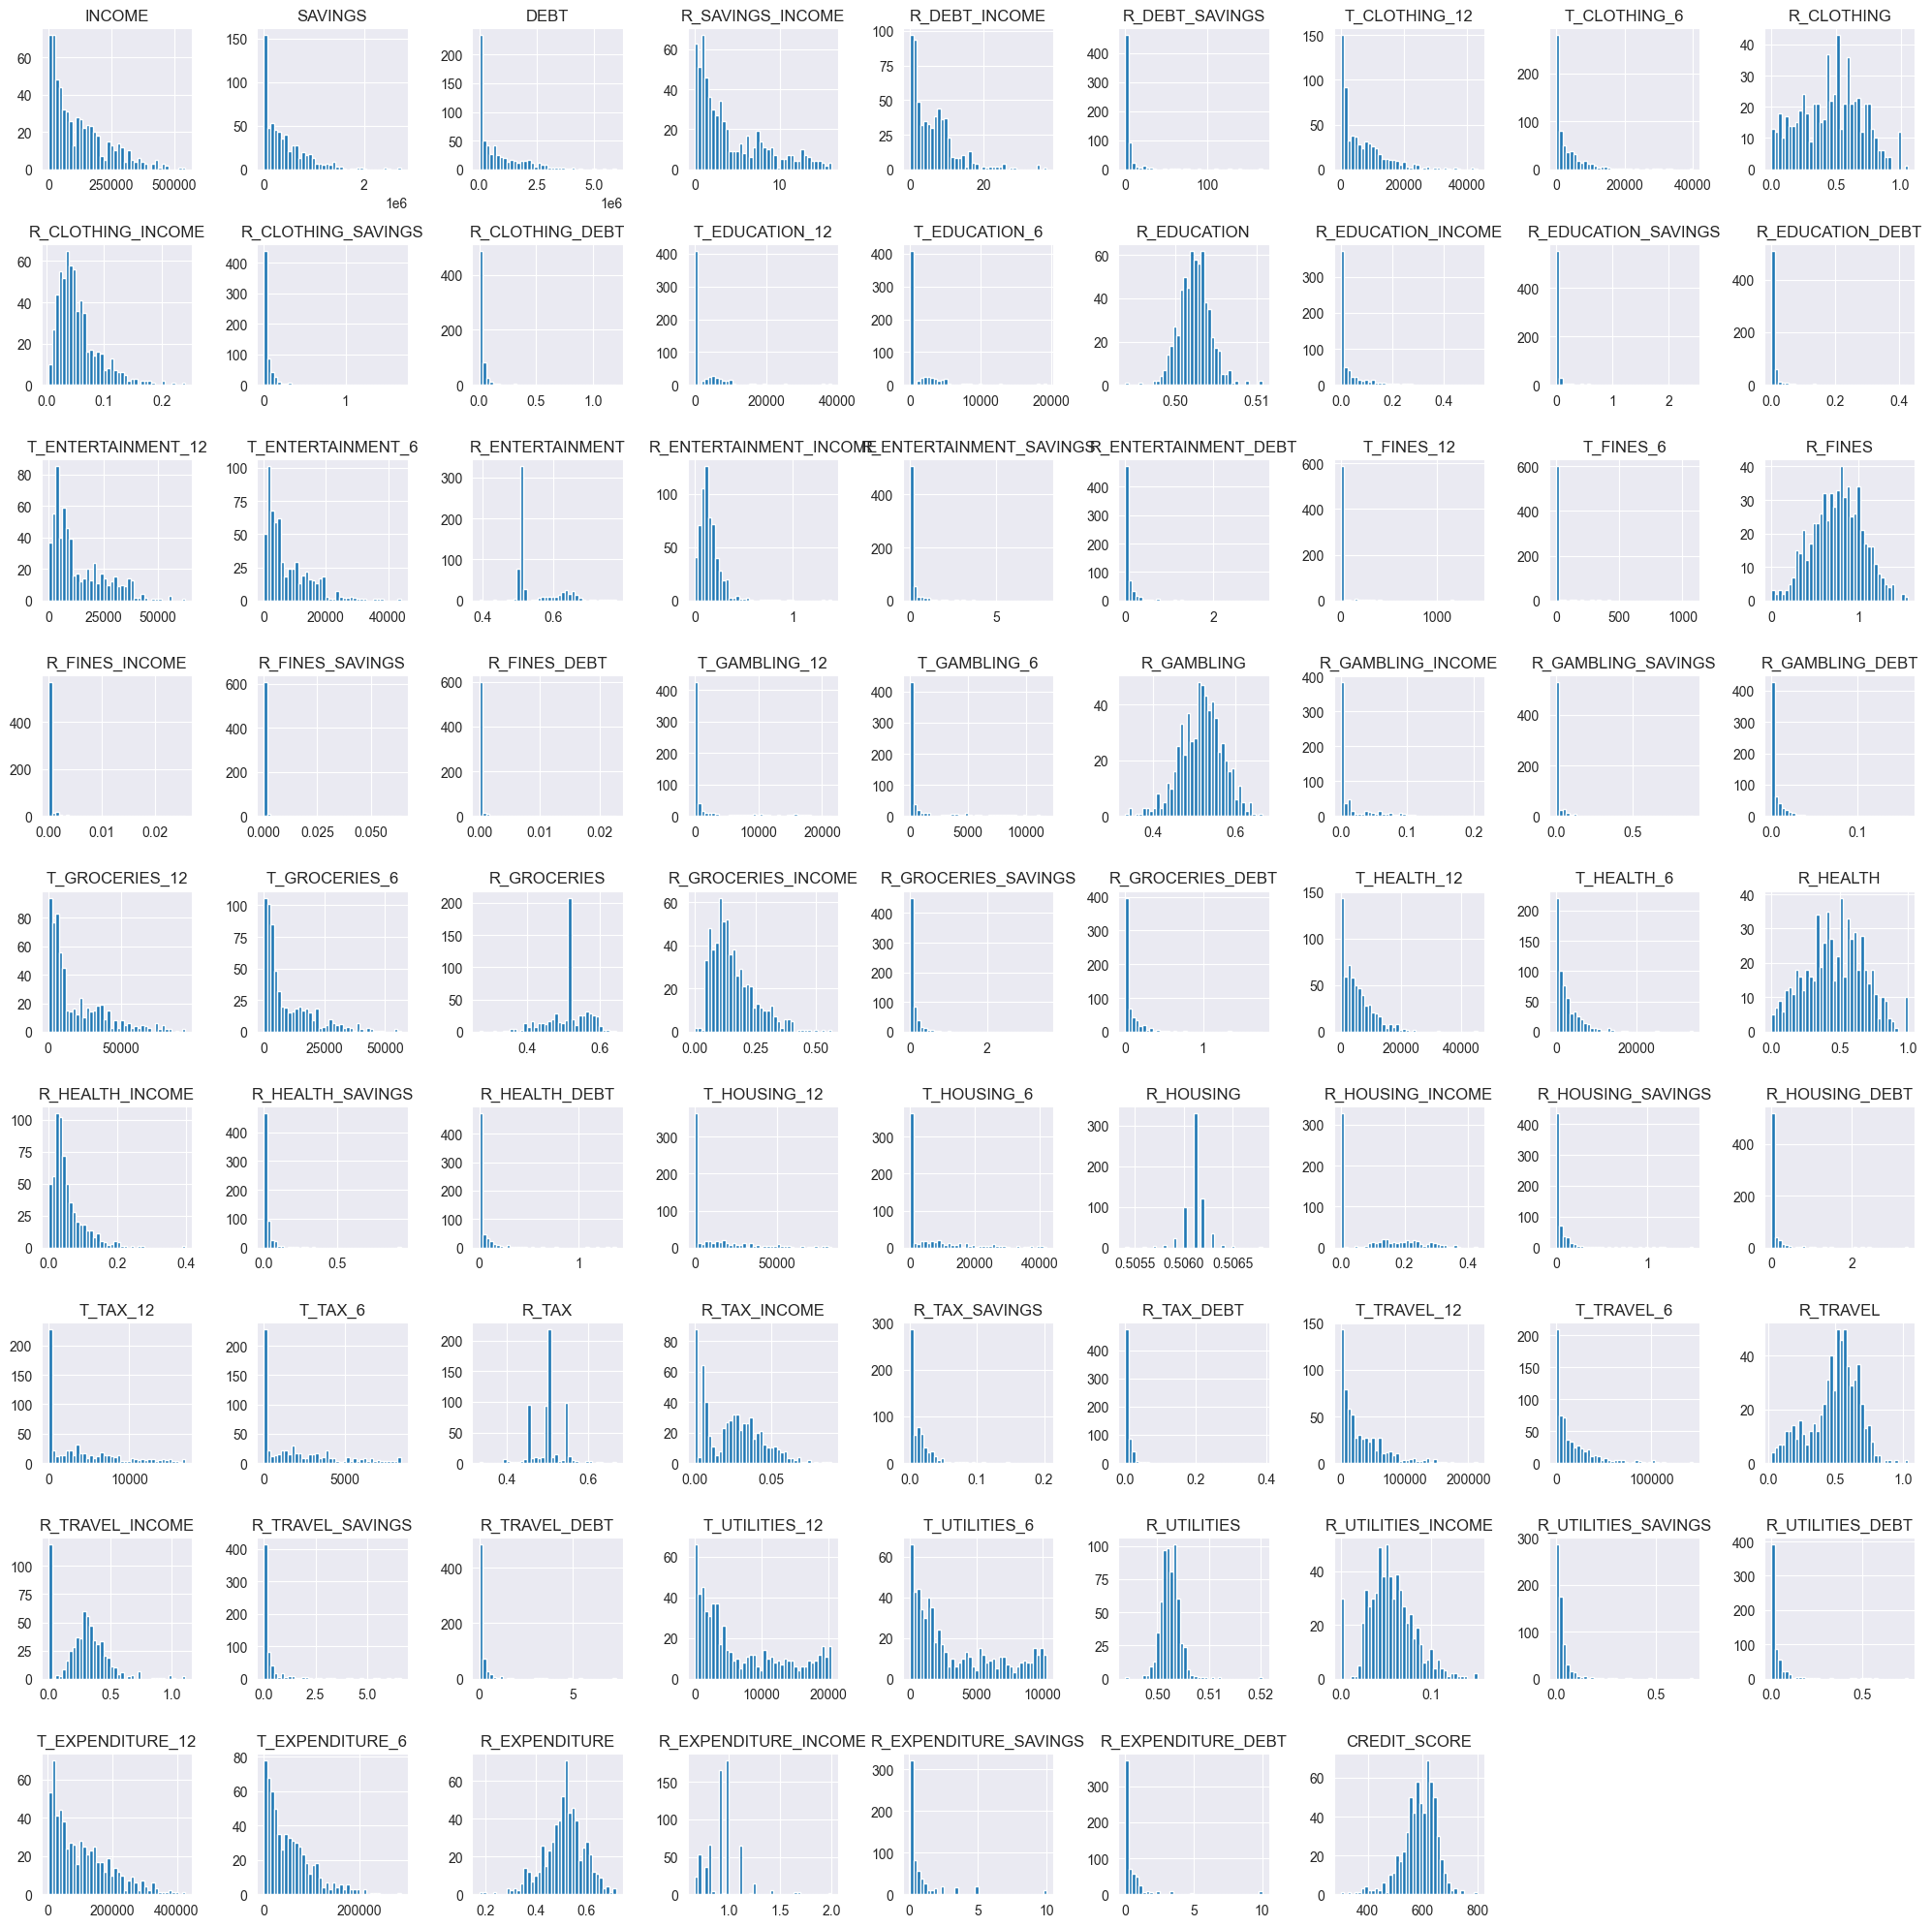

In [7]:
df[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

In [8]:
# use standard scaler for rest_cols
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2=df.copy()
df2[rest_cols] = scaler.fit_transform(df2[rest_cols])
df2.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,-1.075443,-0.946213,-0.820846,-0.886941,-1.045255,-0.381791,-0.897952,-0.655681,1.088004,-0.490125,...,1.003918,-0.465591,No,0,0,0,1,0,-0.274738,0
1,1.715935,0.049251,-0.122452,-0.701347,-0.656574,-0.275978,3.901139,5.000188,1.488721,1.655519,...,-0.193658,-0.173569,High,1,0,1,1,0,1.673812,0
2,0.348608,0.211348,1.925962,-0.260171,1.925992,-0.023686,-0.413050,-0.177471,0.932286,-0.879735,...,-0.366333,-0.419785,No,1,1,1,1,1,-1.079923,0
3,-0.956935,-0.731158,-0.800295,0.457268,-0.820684,-0.367593,-0.826283,-0.633705,-0.709513,-0.412202,...,-0.459403,0.140843,No,1,0,0,1,0,1.077975,0
4,0.630319,2.215053,1.735160,0.754139,1.269553,-0.259496,-0.203682,-0.217921,-0.087068,-0.760069,...,-0.476251,-0.406776,No,1,1,0,1,1,-0.564605,0


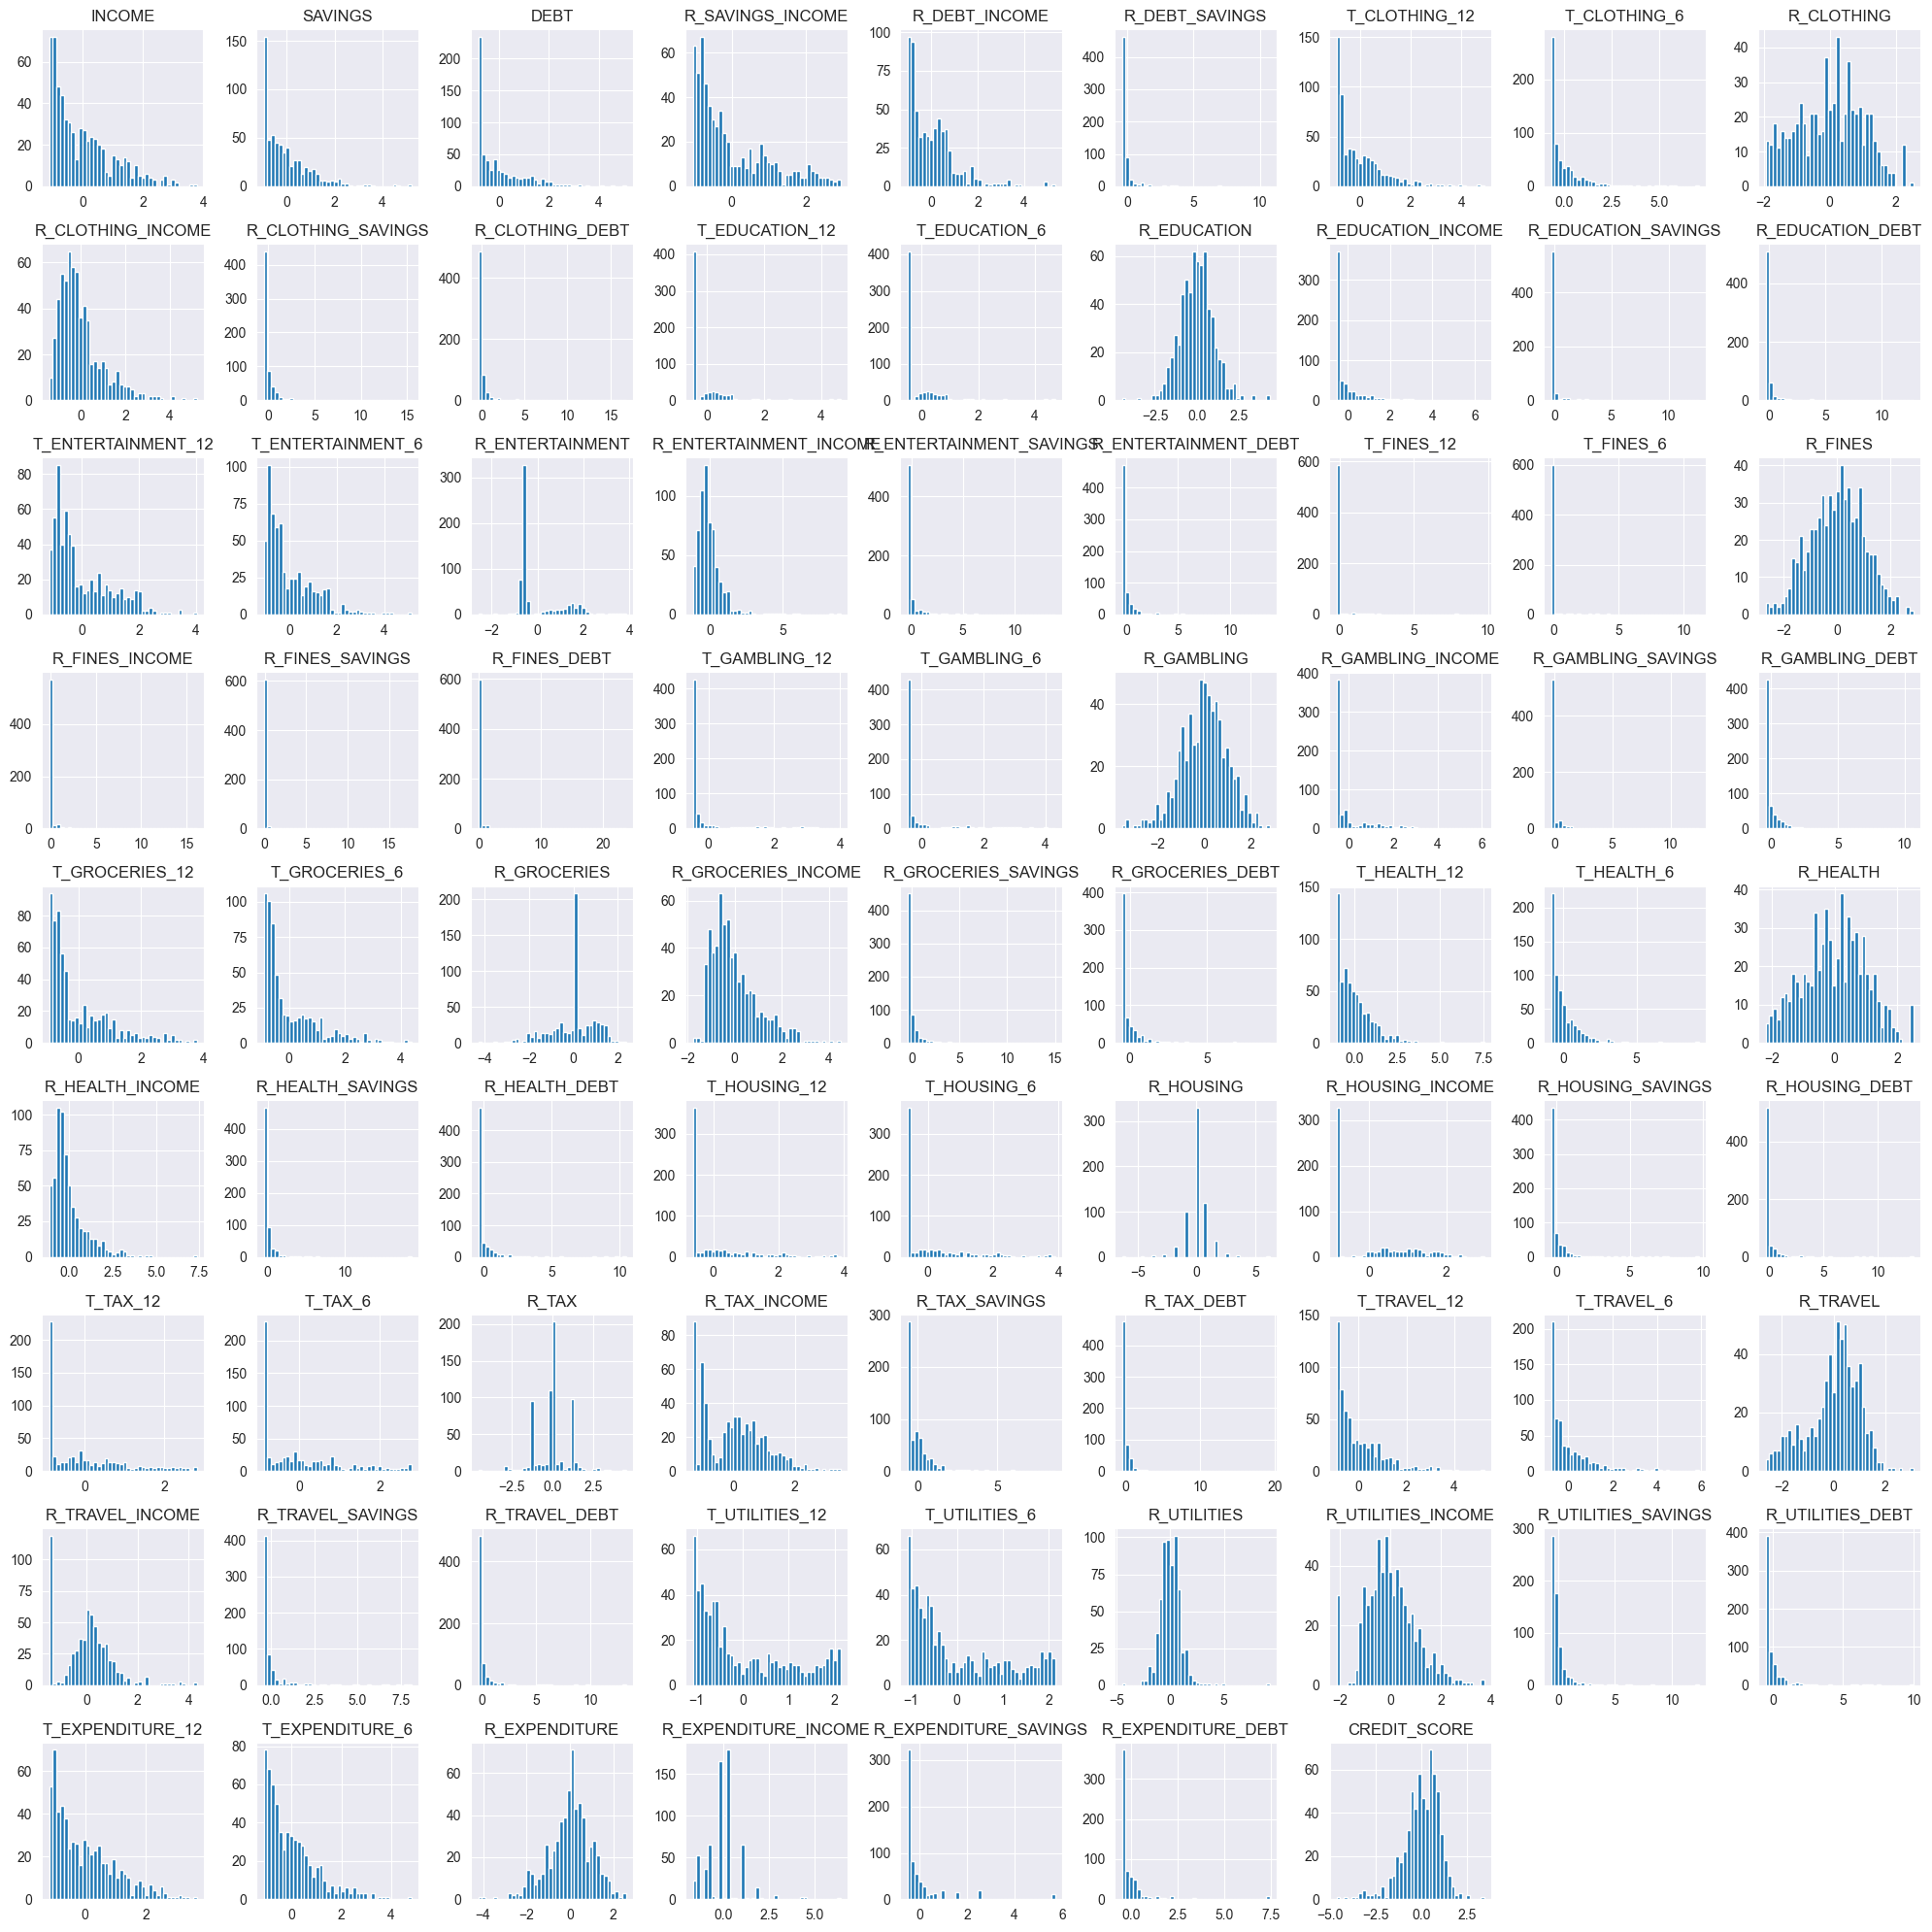

In [9]:
# histogram of rest_cols
df2[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

In [10]:
# use Box Cox transformation for rest_cols
from scipy.stats import boxcox
df2=df.copy()
for col in rest_cols:
    df2[col] = boxcox(df2[col]+1)[0]
df2.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,43.459601,28.600123,0.000000,0.495605,0.000000,0.000000,9.924372,7.003166,0.690181,0.027768,...,0.482606,0.000000,No,0,0,0,1,0,8.383897e+07,0
1,241.416057,162.327132,94.552153,0.837915,1.265938,0.793731,70.869805,36.115755,0.777806,0.052375,...,0.309363,0.217763,High,1,0,1,1,0,1.506710e+08,0
2,190.490817,169.976872,131.672996,1.319896,3.469615,1.316598,34.737136,19.786169,0.655954,0.019159,...,0.213054,0.052655,No,1,1,1,1,1,6.339584e+07,0
3,82.849139,101.686796,39.199909,1.749466,0.875886,0.186041,19.314106,9.495216,0.288280,0.029270,...,0.132100,0.303274,No,1,0,0,1,0,1.274213e+08,0
4,202.960902,230.871110,129.412824,1.872176,3.142675,0.855484,38.876541,19.351044,0.429239,0.022012,...,0.114114,0.065827,No,1,1,0,1,1,7.603568e+07,0


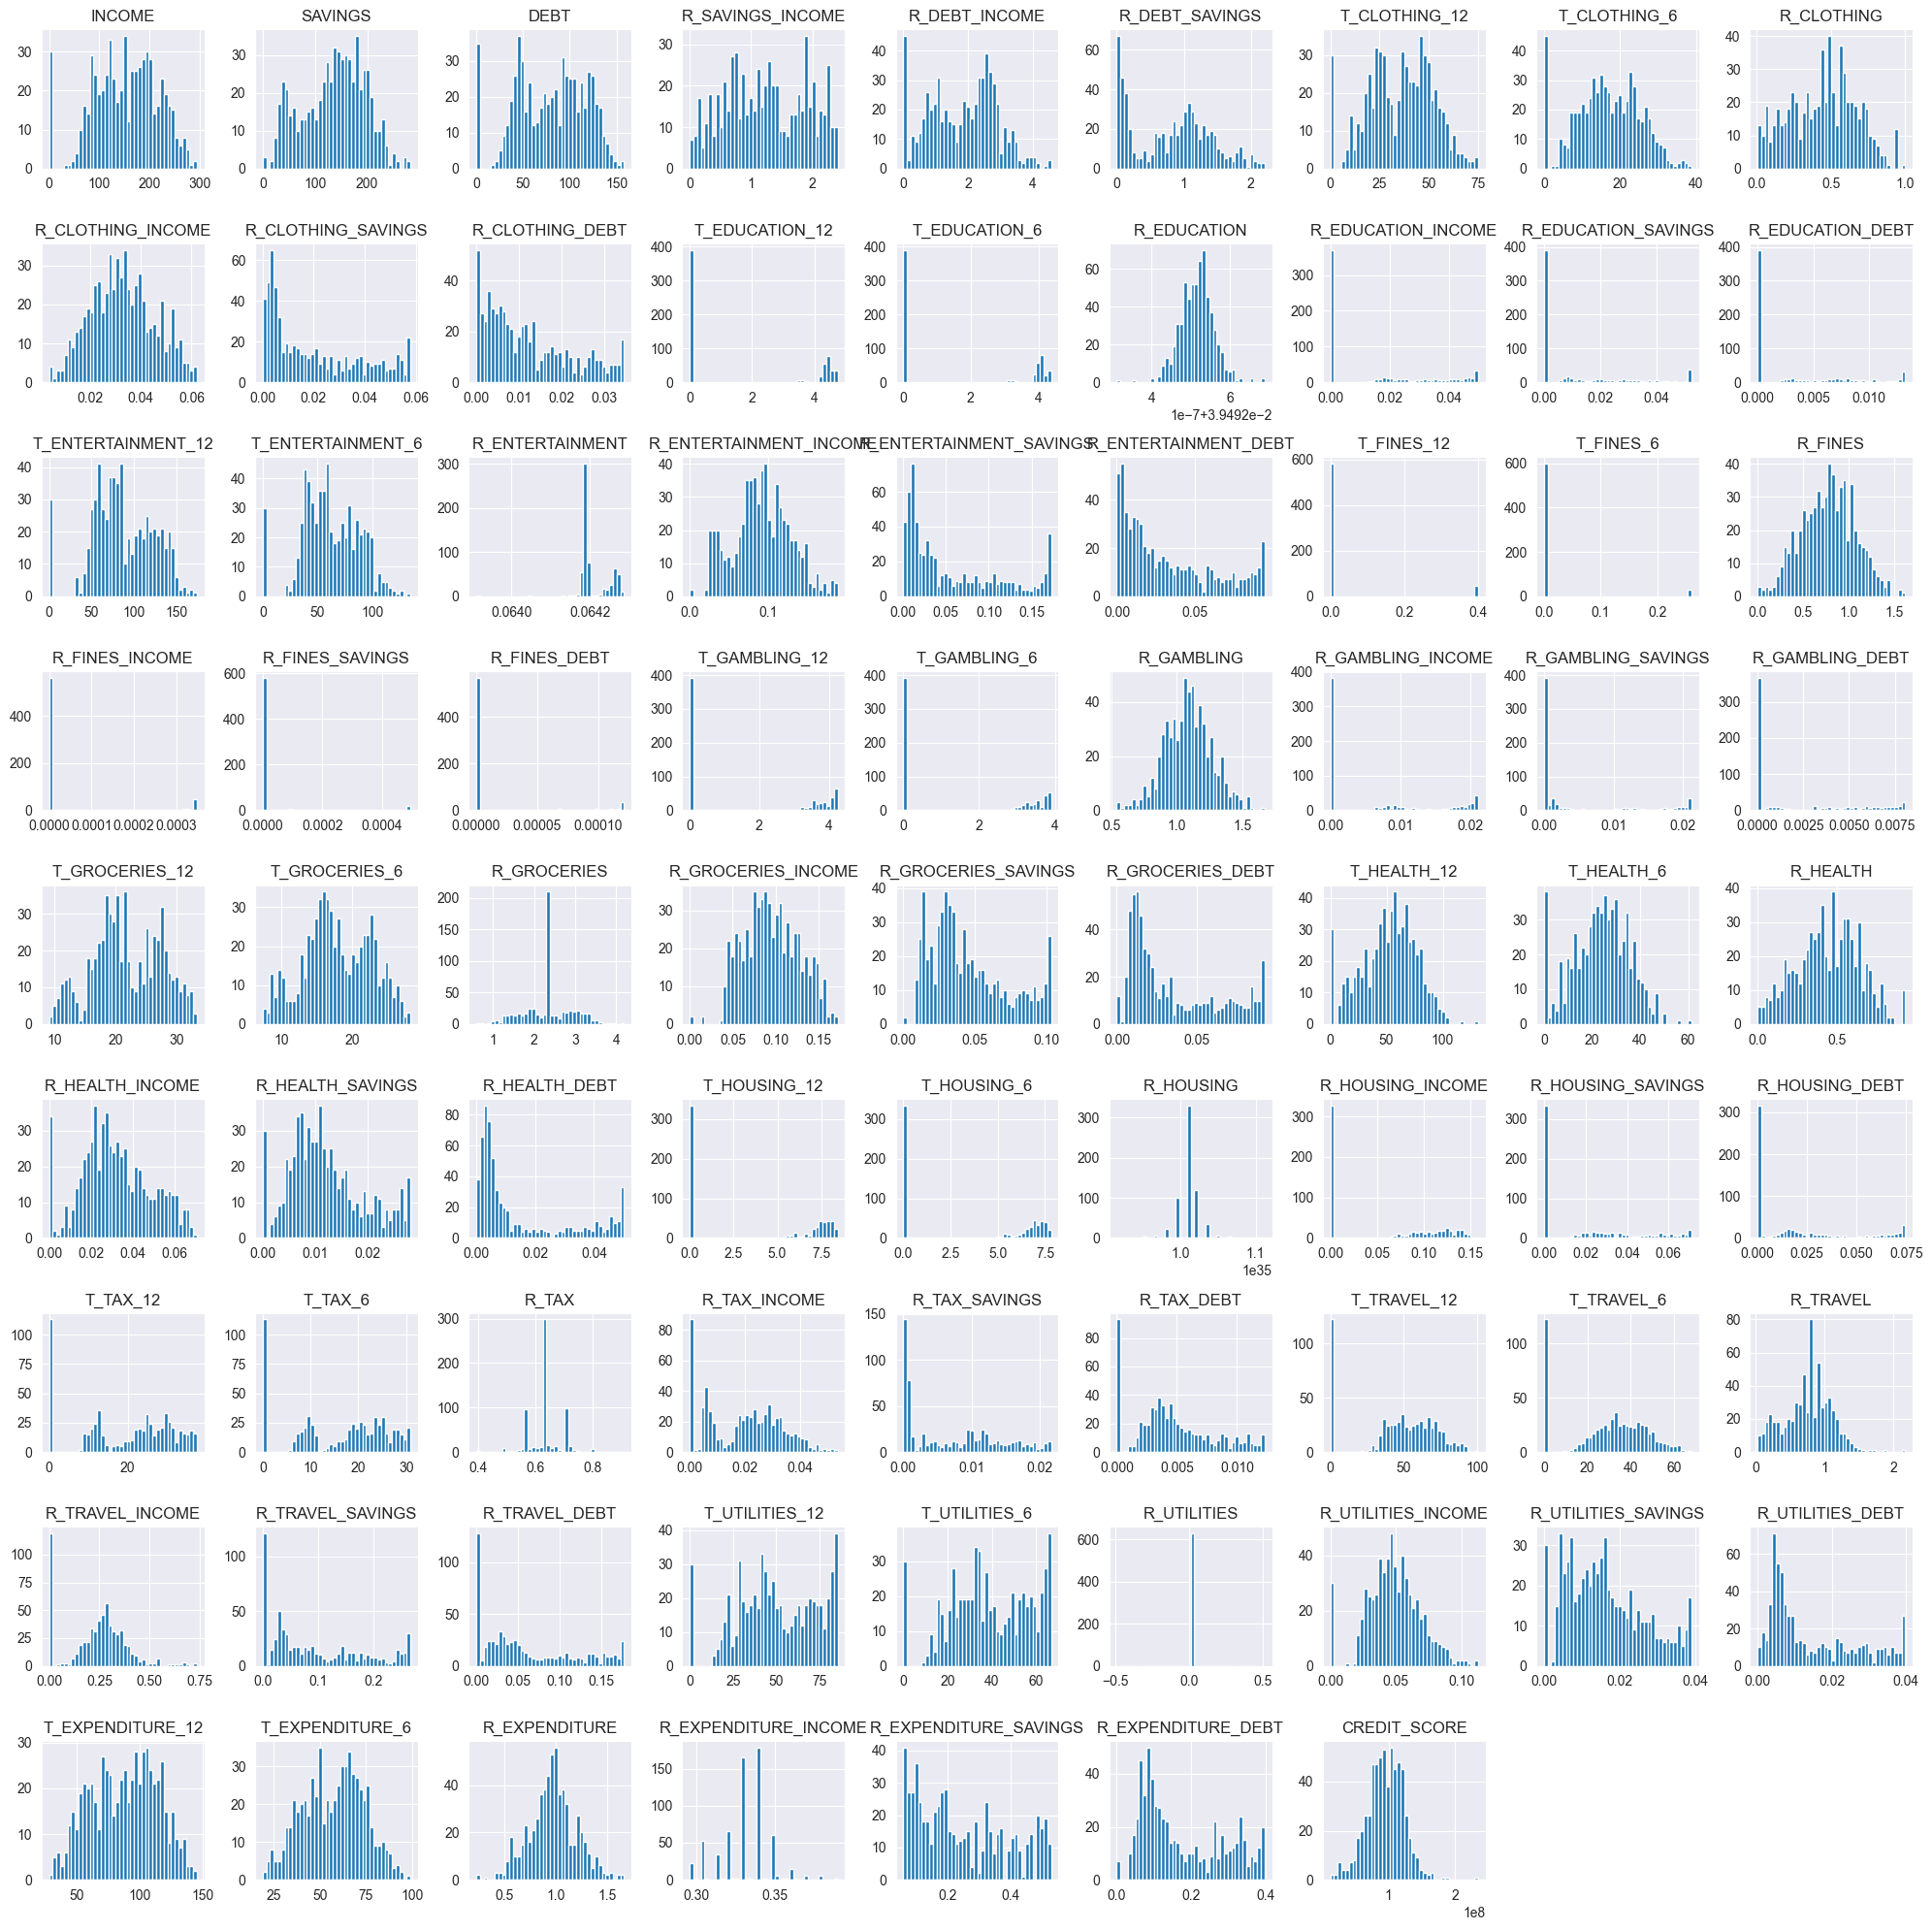

In [11]:
# histogram of rest_cols
df2[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

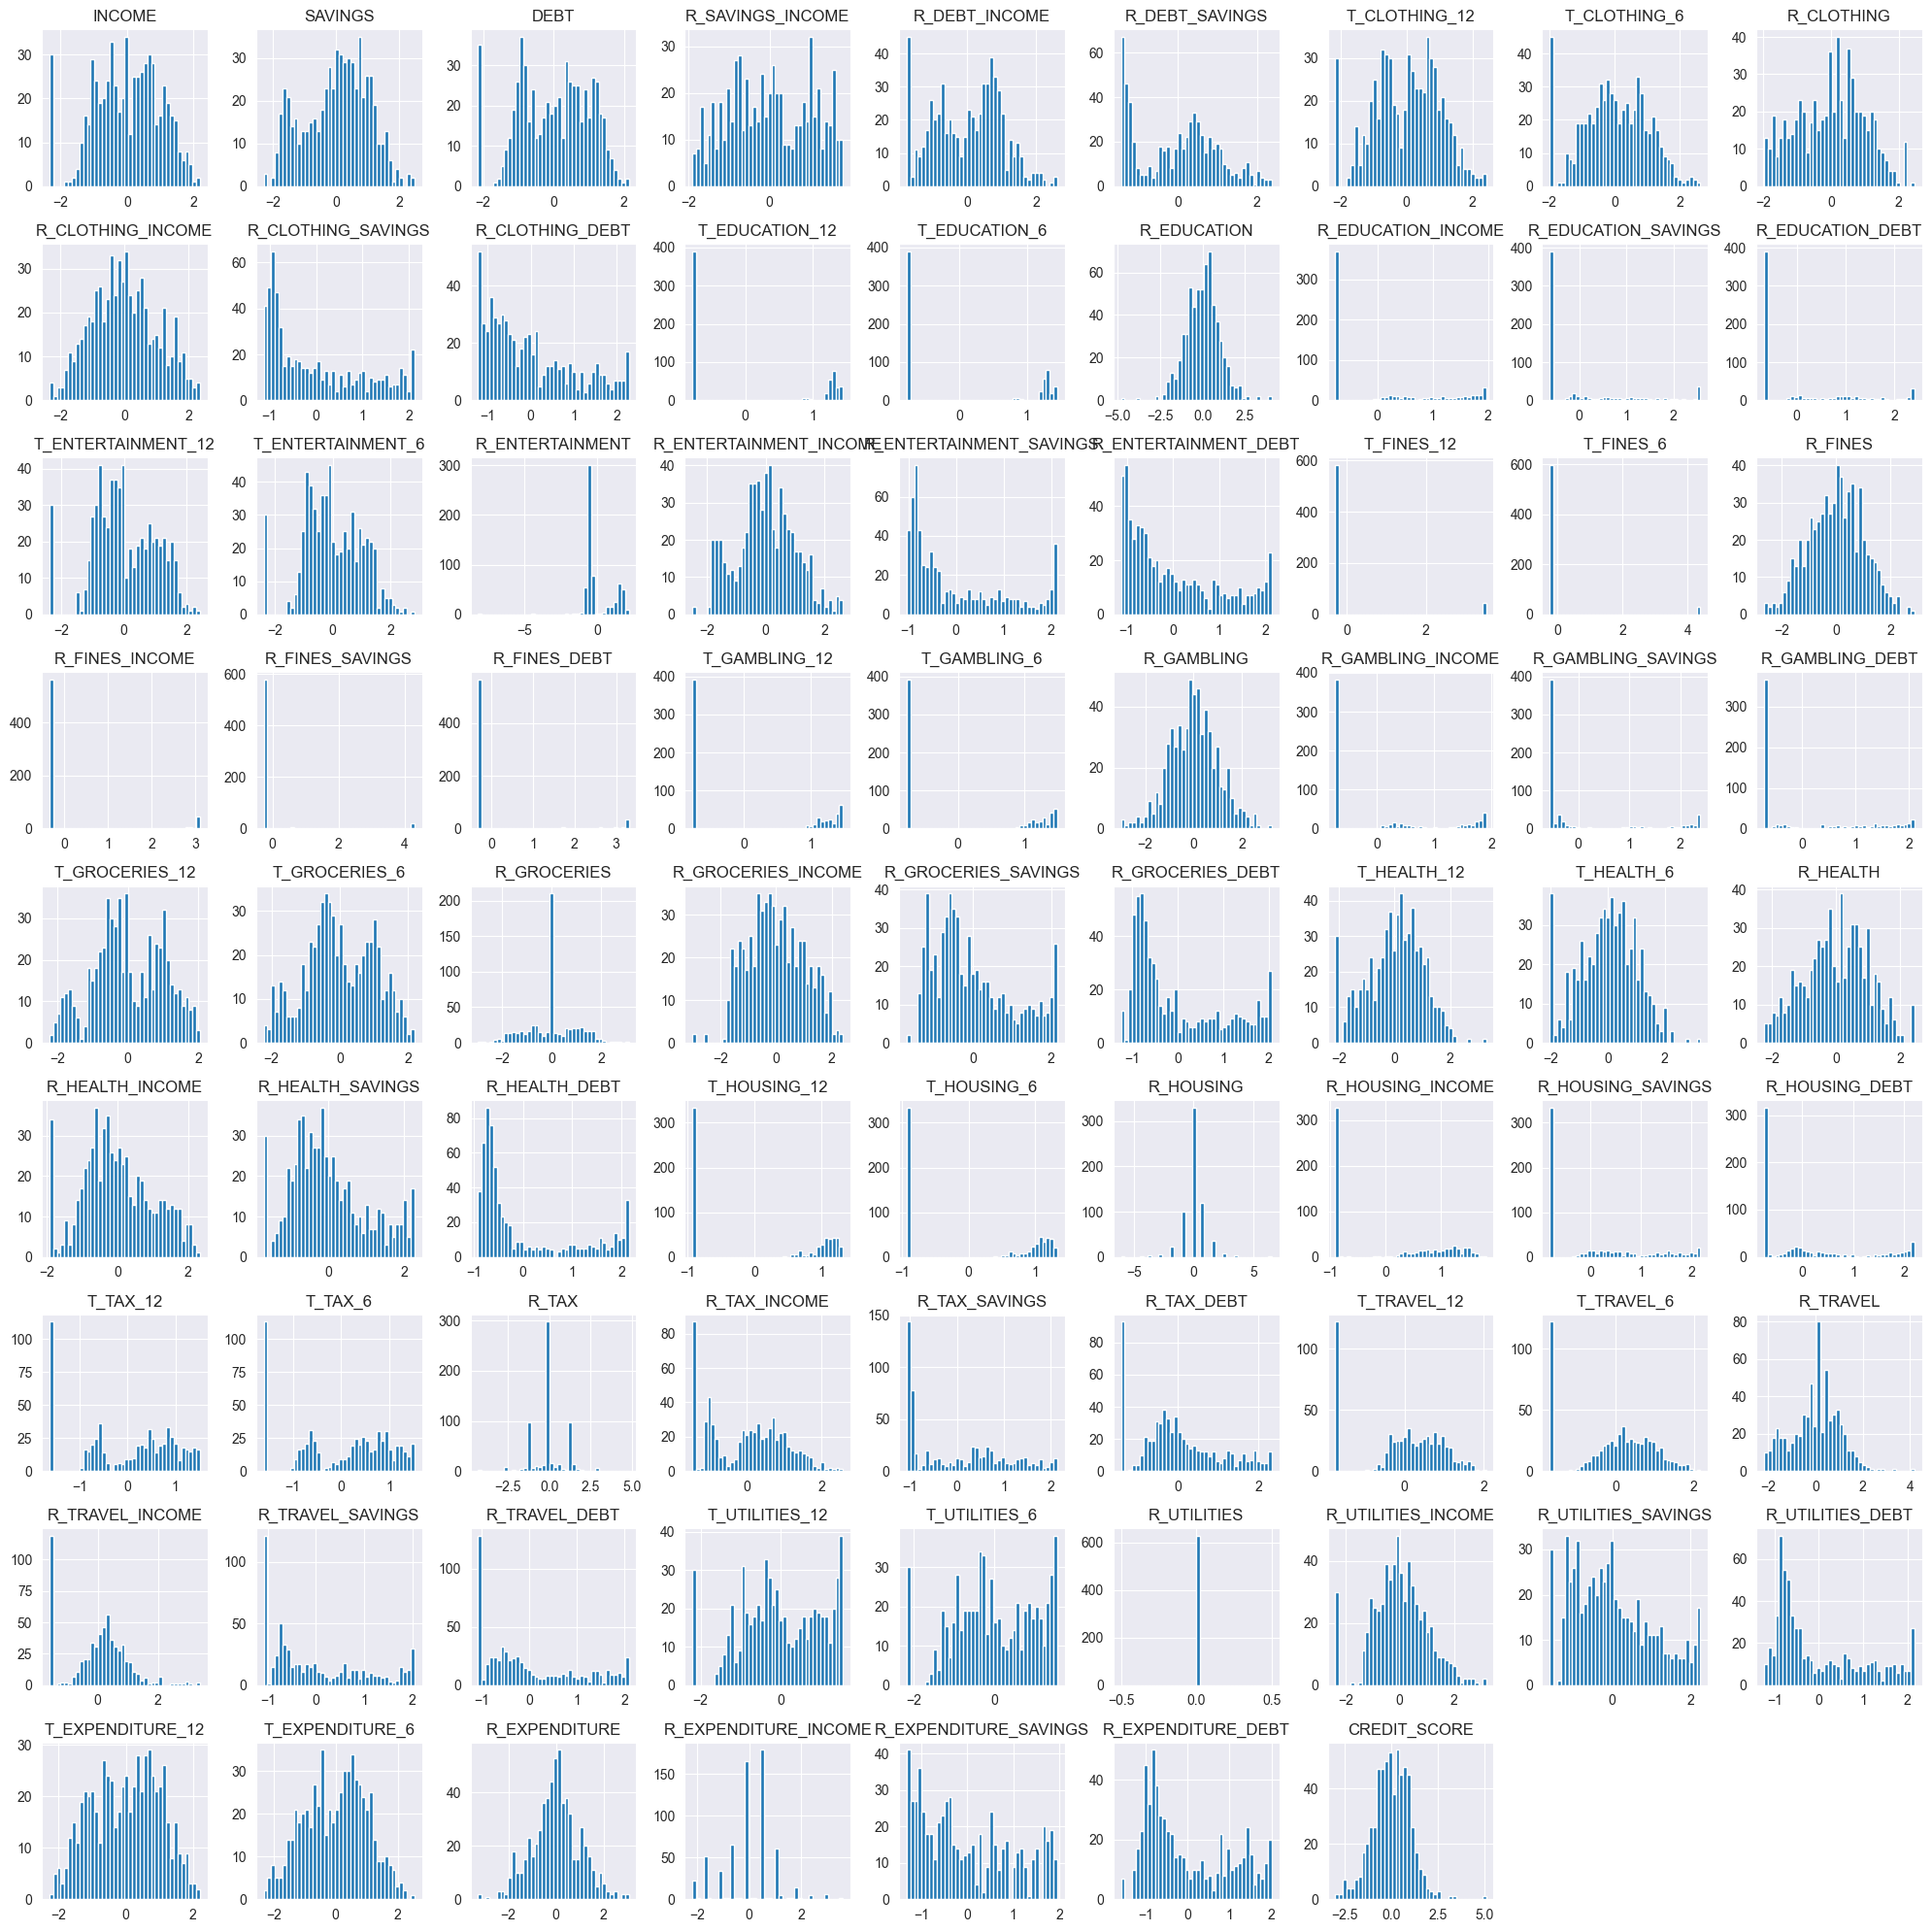

In [12]:
# do standard scaler for rest_cols
df2[rest_cols] = scaler.fit_transform(df2[rest_cols])

# histogram of rest_cols
df2[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

In [13]:
target="DEFAULT"
df_train=pd.read_csv('../data/for_modelling/credit_score_train.csv')
df_val=pd.read_csv('../data/for_modelling/credit_score_valid.csv')
# transform both train and valid datasets (BOX COX and Standard Scaler)
df_train2=df_train.copy()
df_val2=df_val.copy()
for col in rest_cols:
    df_train2[col] = boxcox(df_train2[col]+1)[0]
    df_val2[col] = boxcox(df_val2[col]+1)[0]
df_train2[rest_cols] = scaler.fit_transform(df_train2[rest_cols])
df_val2[rest_cols] = scaler.transform(df_val2[rest_cols])
# map CAT_GAMBLING (No-0, Low-1, High-2)
df_train2['CAT_GAMBLING'] = df_train2['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
df_val2['CAT_GAMBLING'] = df_val2['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})

In [14]:
X=df_train2.drop(target, axis=1)
y=df_train2[target]

In [20]:
# SVC model
from sklearn.svm import SVC # another kernels than rbf and poly with 10 degrees are useless
from sklearn.metrics import accuracy_score
model = SVC(random_state=42, kernel='poly', degree=10)
model.fit(X, y)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.717391304347826

In [21]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(df_val2.drop(target, axis=1))
accuracy_score(df_val2[target], y_pred)

0.6014492753623188

In [26]:
# before transformation Random Forest model
X=df_train.drop(target, axis=1)
X_val=df_val.drop(target, axis=1)
X_val['CAT_GAMBLING'] = X_val['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
# map CAT_GAMBLING (No-0, Low-1, High-2)
X['CAT_GAMBLING'] = X['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})
y=df_train[target]
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
y_pred = model.predict(X_val)
accuracy_score(df_val[target], y_pred)

0.7101449275362319

TREE IS BETTER FOR UNTRANSFORMED DATA

log transformation

In [34]:
# use log transformation for rest_cols
df2=df.copy()
for col in rest_cols:
    df2[col] = np.log1p(df2[col]+1)
df2.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,7.932003,7.526718,0.693147,0.980767,0.693147,0.693147,4.653960,4.330733,1.000043,0.711478,...,1.504144,0.693147,No,0,0,0,1,0,6.349139,0
1,12.658523,13.006827,13.469451,1.228675,1.446919,1.277651,10.487461,10.280519,1.034287,0.748629,...,0.950963,0.863059,High,1,0,1,1,0,6.541030,0
2,11.993962,13.157105,14.838860,1.648659,2.954910,1.998096,8.220941,7.837949,0.986414,0.704582,...,0.838329,0.721783,No,1,1,1,1,1,6.257668,0
3,9.681344,11.489524,9.943669,2.091864,1.193922,0.794394,6.459904,5.241747,0.830123,0.712852,...,0.771912,1.018558,No,1,0,0,1,0,6.486161,0
4,12.171621,14.159486,14.766866,2.230014,2.734368,1.344326,8.571303,7.752335,0.892285,0.706705,...,0.759403,0.729768,No,1,1,0,1,1,6.317165,0


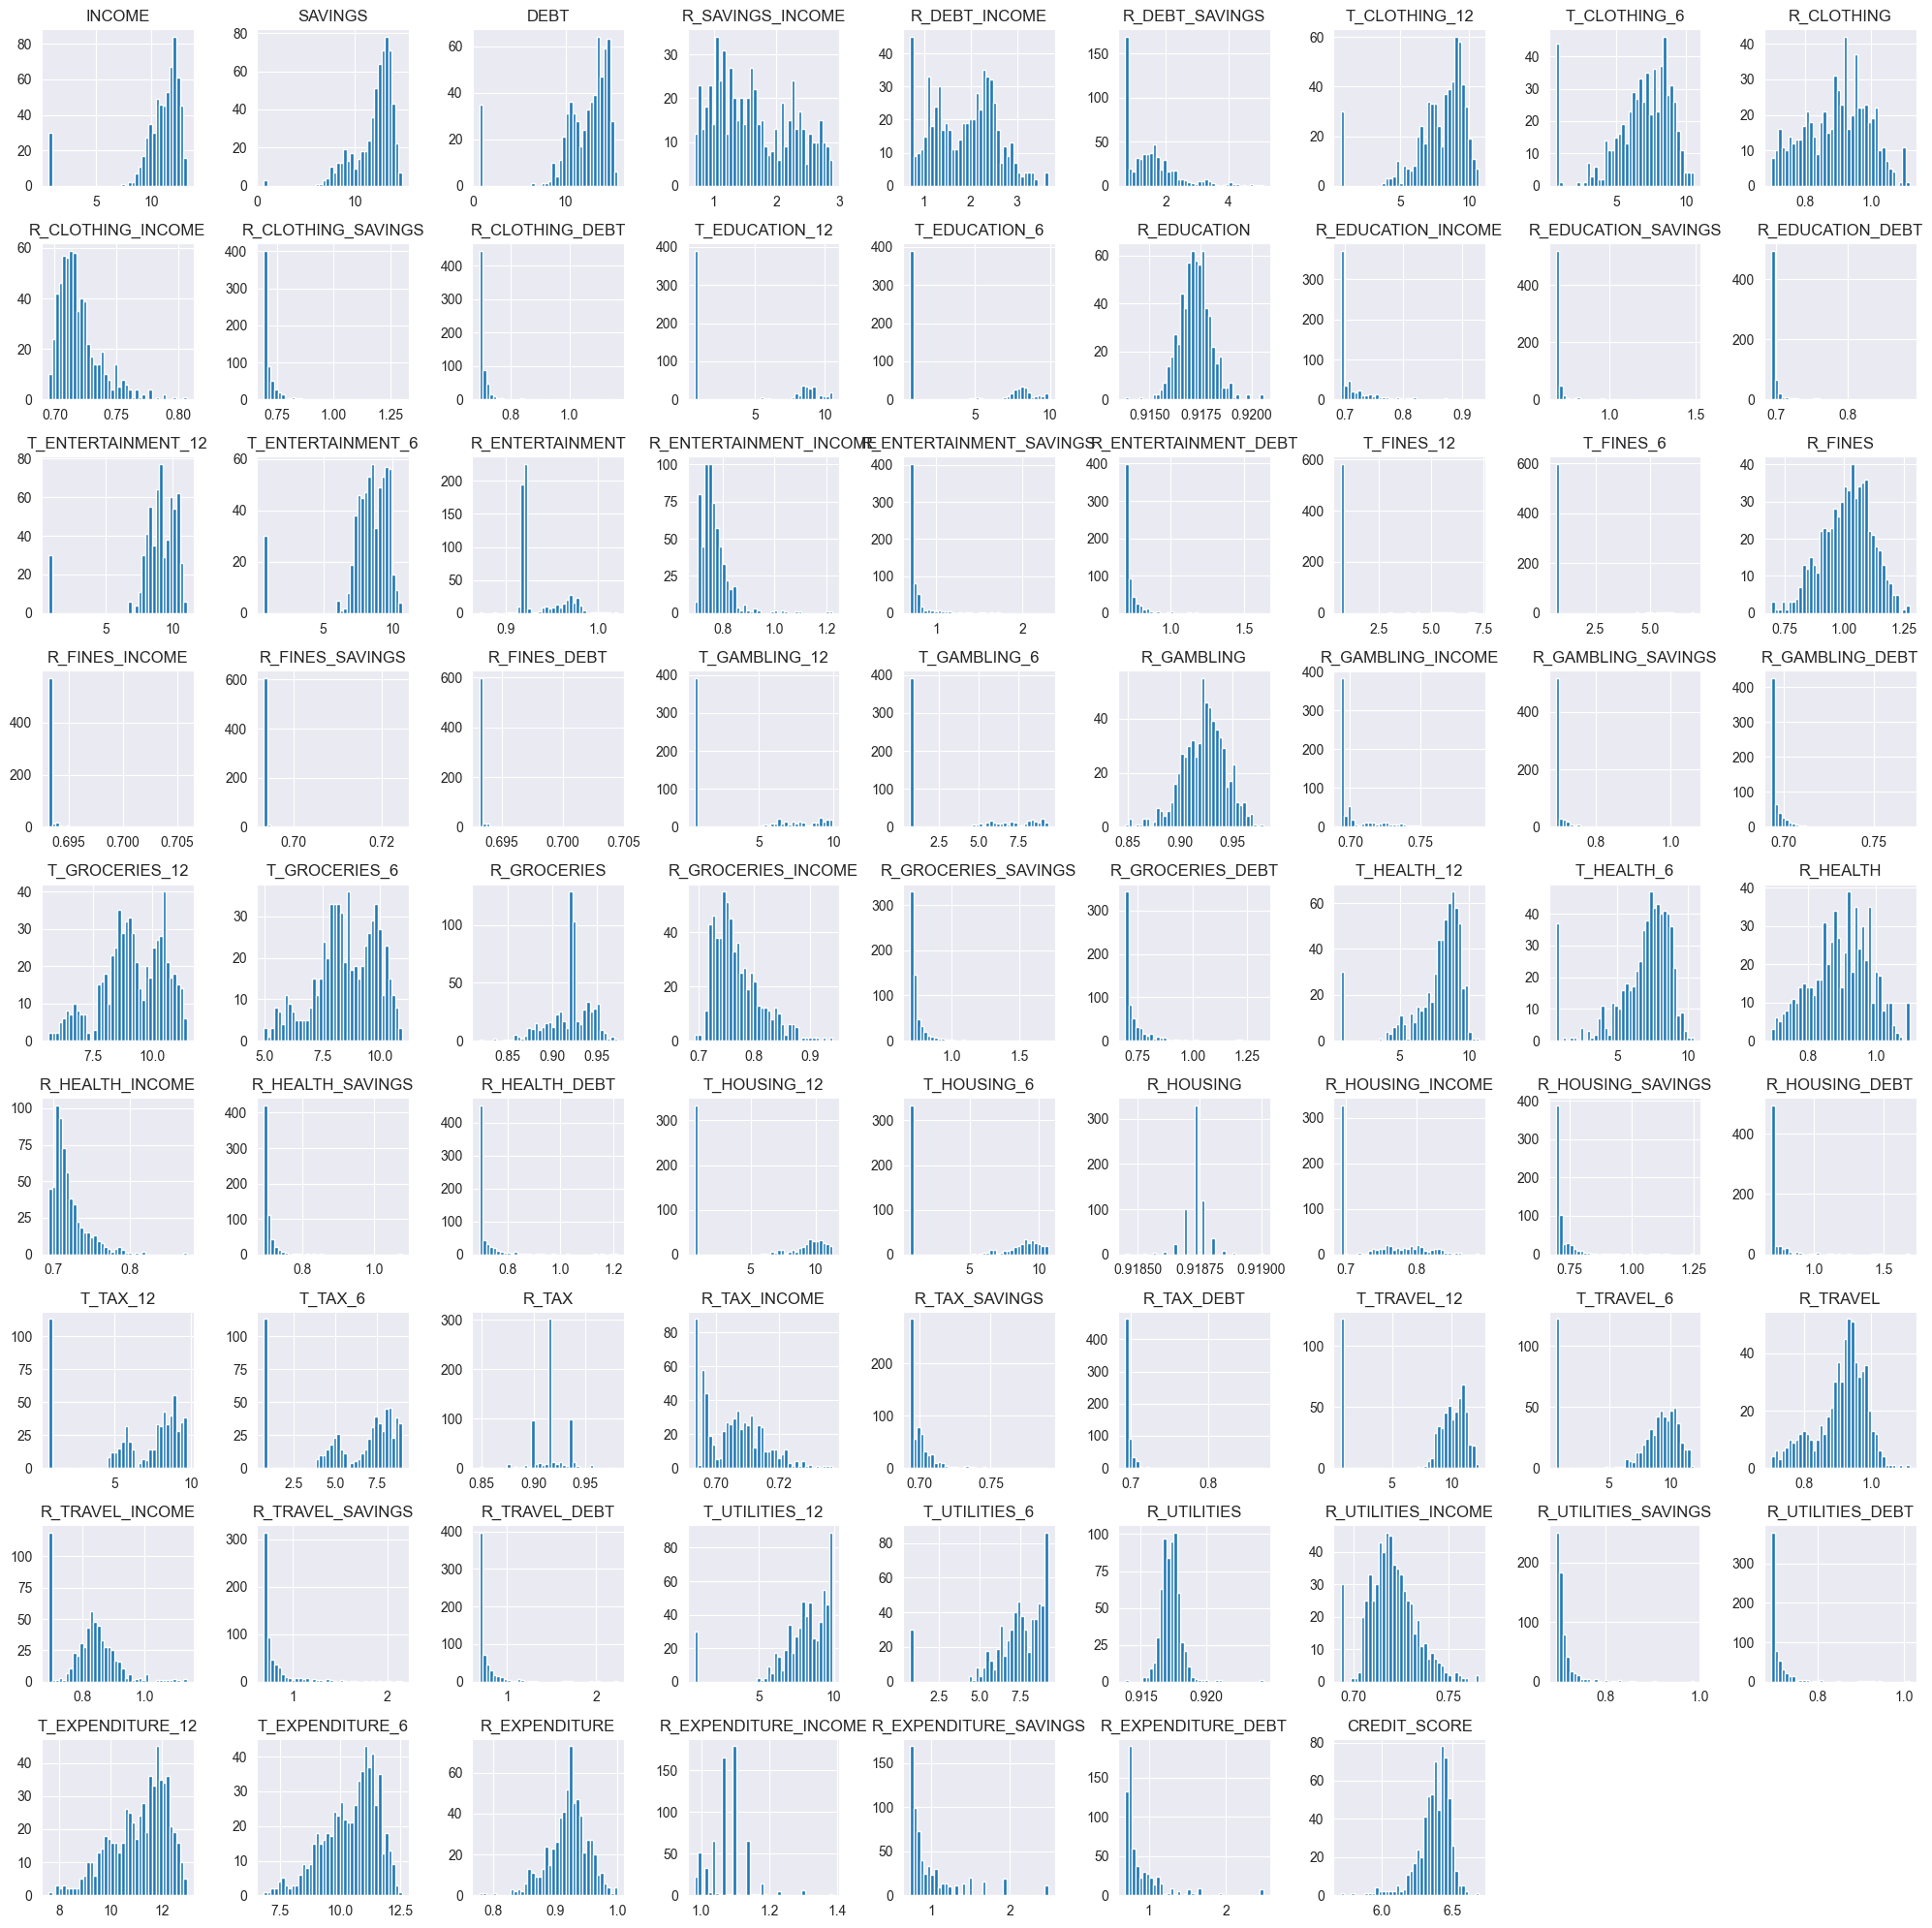

In [35]:
# histogram of rest_cols
df2[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

### MIM MAX TRY

In [36]:
# use MinMaxScaler for rest_cols
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[rest_cols] = scaler.fit_transform(df[rest_cols])
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,0.005100,0.000677,0.000000,0.041369,0.000000,0.000000,0.002381,0.001854,0.677820,0.140152,...,0.244682,0.000000,No,0,0,0,1,0,0.540,0
1,0.576231,0.162679,0.118531,0.087933,0.060810,0.009511,0.829060,0.730422,0.767583,0.464646,...,0.052362,0.037020,High,1,0,1,1,0,0.782,0
2,0.296468,0.189059,0.466187,0.198620,0.464857,0.032190,0.085909,0.063455,0.642938,0.081229,...,0.024632,0.005807,No,1,1,1,1,1,0.440,0
3,0.029348,0.035675,0.003488,0.378619,0.035135,0.001276,0.014727,0.004685,0.275166,0.151936,...,0.009686,0.076879,No,1,0,0,1,0,0.708,0
4,0.354108,0.515142,0.433805,0.453101,0.362156,0.010993,0.121974,0.058244,0.414597,0.099327,...,0.006980,0.007456,No,1,1,0,1,1,0.504,0


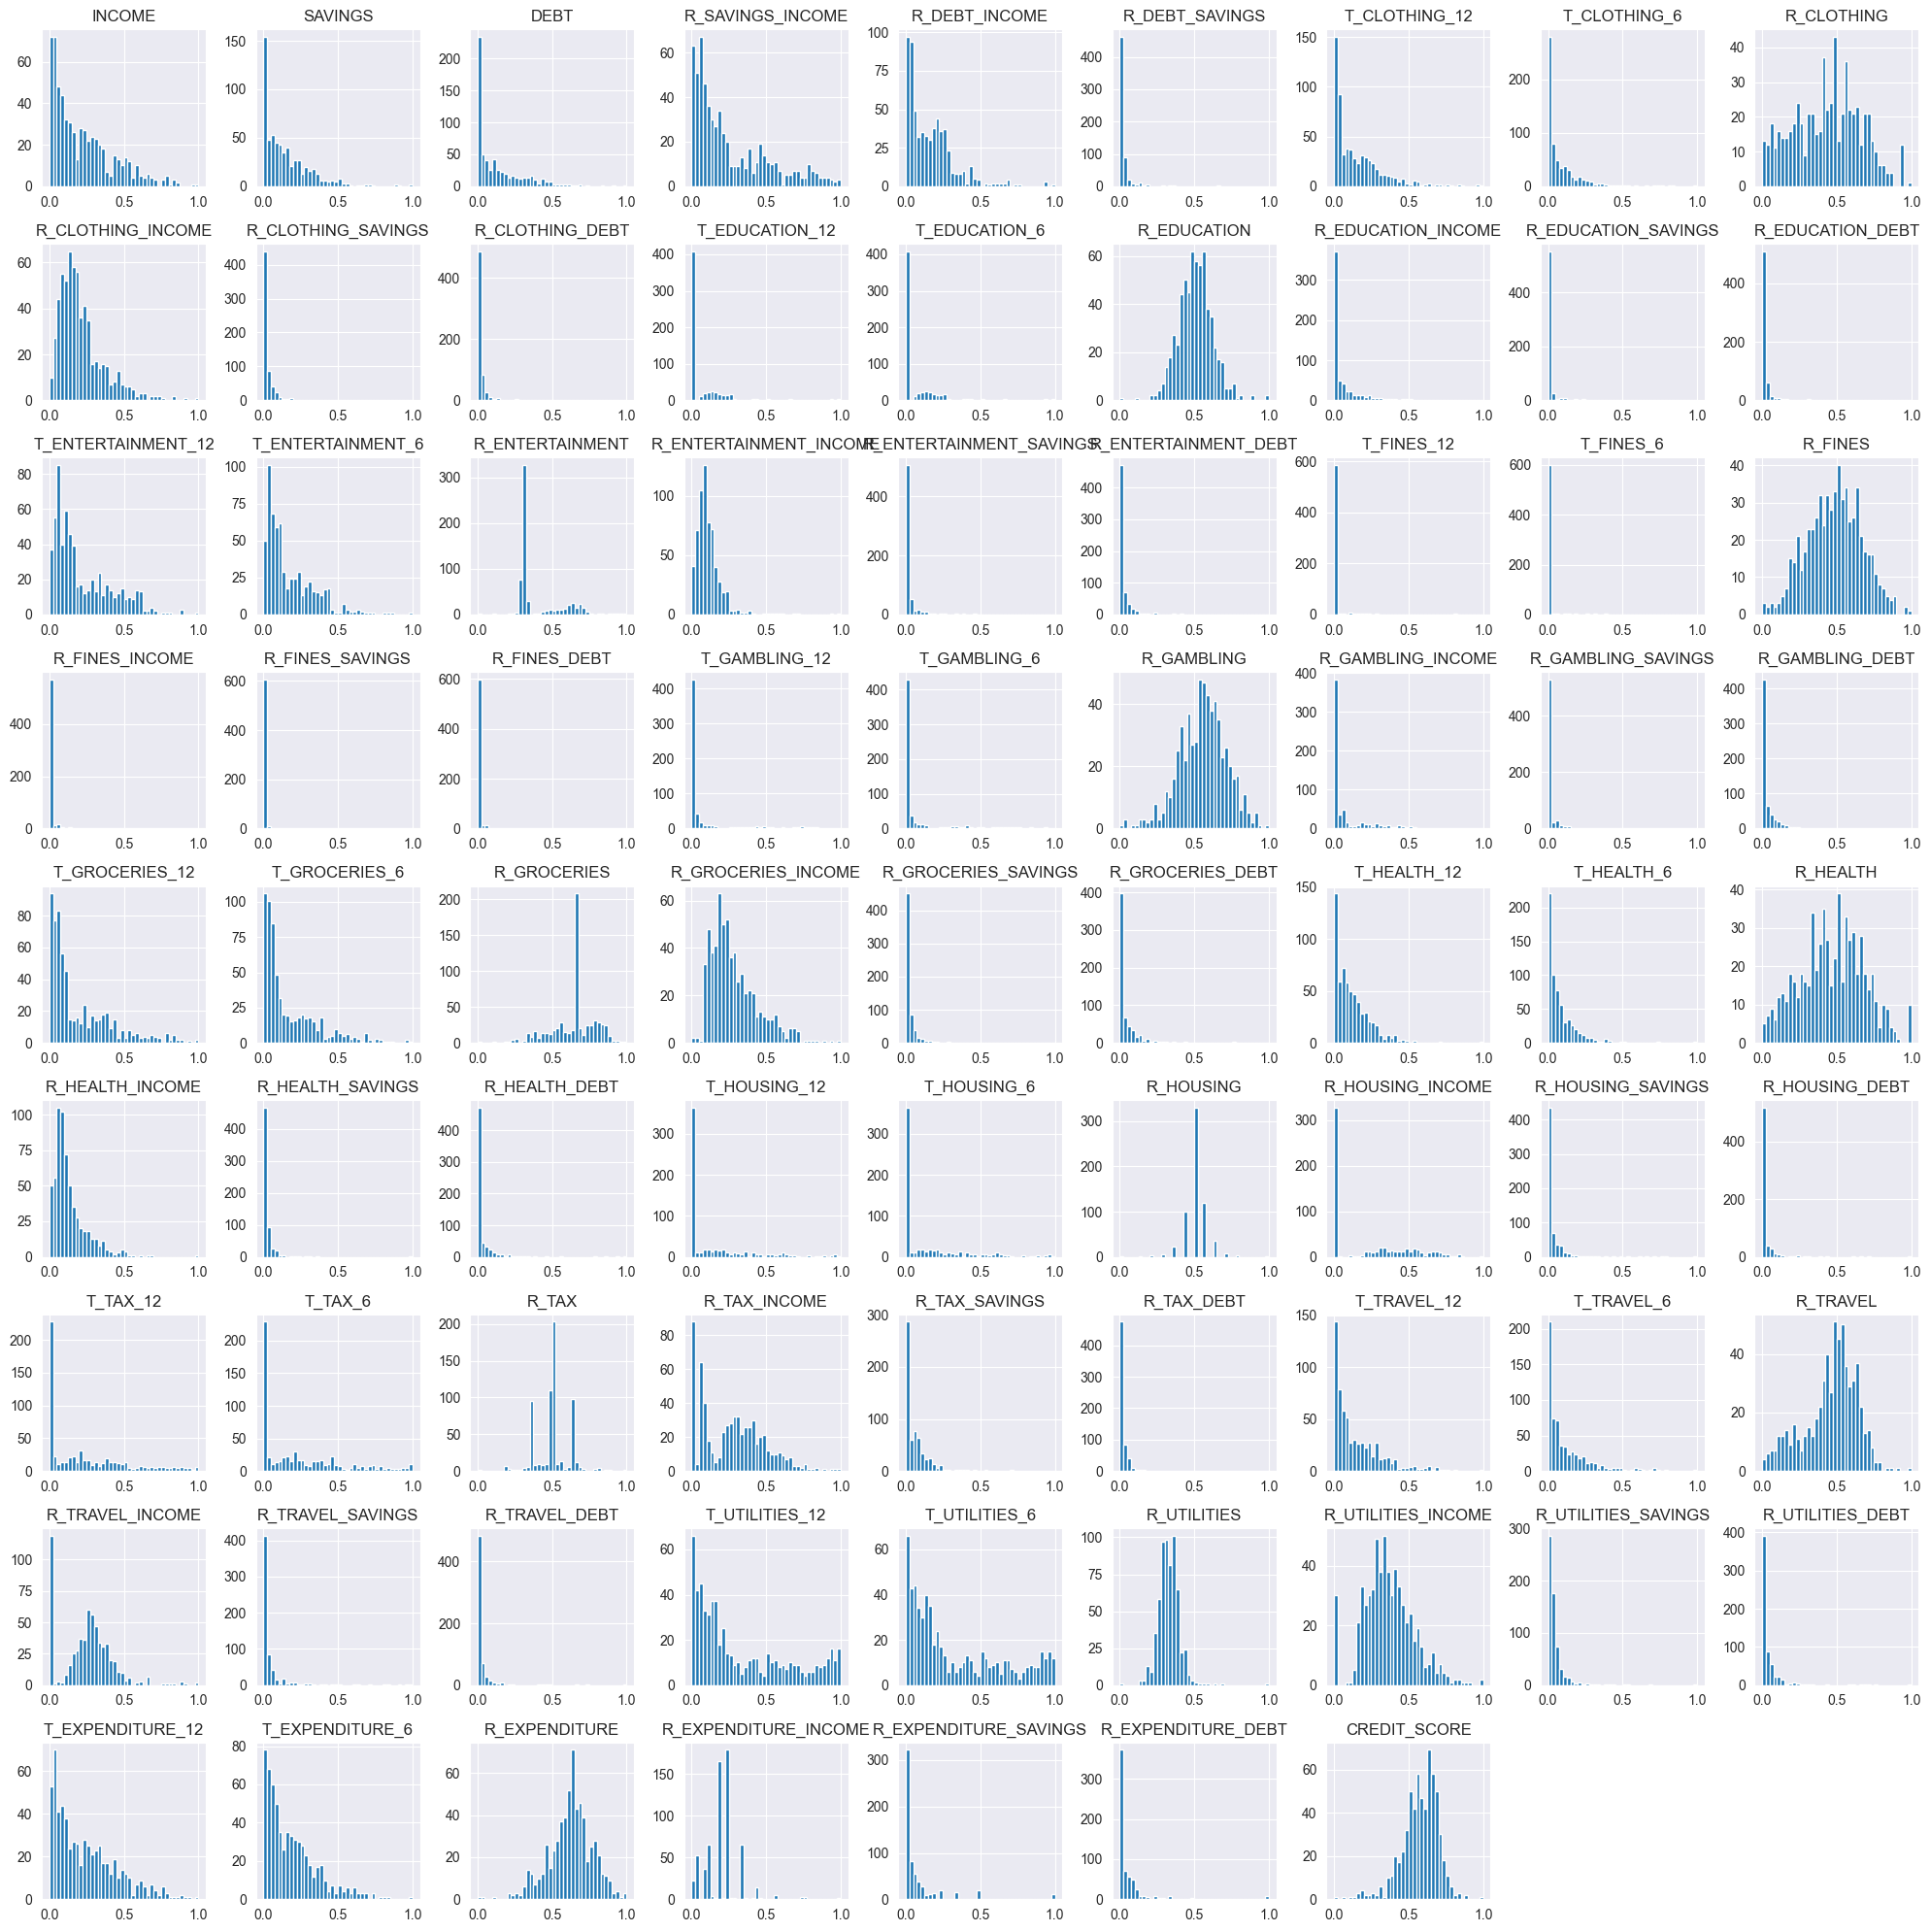

In [37]:
# histogram of rest_cols
df[rest_cols].hist(bins=40, figsize=(20, 20))
plt.tight_layout()
plt.show()

In [8]:
# check variance of every column
df_variance = df.drop("CAT_GAMBLING", axis=1)
df_variance.var().sort_values(ascending=True)

R_HOUSING           1.243661e-08
R_FINES_DEBT        9.168721e-07
R_FINES_INCOME      2.453861e-06
R_EDUCATION         3.682588e-06
R_UTILITIES         3.684665e-06
                        ...     
T_EXPENDITURE_6     2.339506e+09
T_EXPENDITURE_12    7.675550e+09
INCOME              1.248477e+10
SAVINGS             1.988837e+11
DEBT                1.027790e+12
Length: 85, dtype: float64

# TODO 
- zrobić cross walidację na różnych metrykach i modelach
- We are going to use IsolationForest to detect and remove outliers.
 - We are going to use RobustScaler to transform continuous variables.
- Because of correlation between variables we are going to use PCA to reduce dimensionality.

In [2]:
# columns to remove
columns_to_remove = ["T_CLOTHING_12","T_ENTERTAINMENT_12", "T_GROCERIES_12", "T_GROCERIES_6", "T_HEALTH_12", "T_TAX_12", "T_TAX_6", "T_TRAVEL_12", "T_TRAVEL_6","T_UTILITIES_12", "T_UTILITIES_6", "T_EXPENDITURE_12", "T_EXPENDITURE_6"]
columns_to_remove

['T_CLOTHING_12',
 'T_ENTERTAINMENT_12',
 'T_GROCERIES_12',
 'T_GROCERIES_6',
 'T_HEALTH_12',
 'T_TAX_12',
 'T_TAX_6',
 'T_TRAVEL_12',
 'T_TRAVEL_6',
 'T_UTILITIES_12',
 'T_UTILITIES_6',
 'T_EXPENDITURE_12',
 'T_EXPENDITURE_6']